## *Bankers in the Ivory Tower*
### By Charlie Eaton

### Figure 5.3: Average student outcomes adjusted for student body characteristics

In [1]:
ssc install blindschemes

checking blindschemes consistency and verifying not already installed...
all files already exist and are up to date.


In [2]:
set scheme plotplainblind
use data/d_bankers_for_profits, replace
recode owner_pe (1=1 "Investor owned") (2=1 "Investor owned") (3=2 "Privately held") (4=3 "Non-profit & public"), gen(ownership)
replace grad_rate_150_p2yr_w=. if control==1

**swithch loan data to 2016 $

replace loan_amount_ftfrosh_c_w=loan_amount_ftfrosh_c_w/0.988




(176138 differences between owner_pe and ownership)

(27,381 real changes made, 27,381 to missing)

(85,279 real changes made)






Variables that uniquely identify margins: ownership


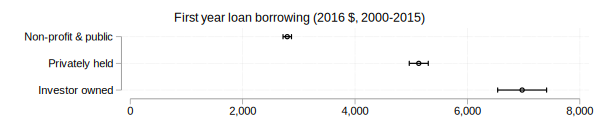

In [3]:
*Adjusted Loans
quietly reg loan_amount_ftfrosh_c_w i.ownership selective white_share_w ///
black_share_w hisp_share_w i.iclevel i.year i.state_n pell_grants_per_fte_c_w  , cluster(systemid) rob noomitted

quietly margins i.ownership, atmeans

marginsplot, horizontal unique recast(scatter) xtitle("") scale(3) xsize(4.5) xlabel(0(2000)8000, format(%9.0fc)) ysize(1) ///
ytitle("") title("First year loan borrowing (2016 $, 2000-2015)") name(borrowing) graphregion(margin(large))





Variables that uniquely identify margins: ownership


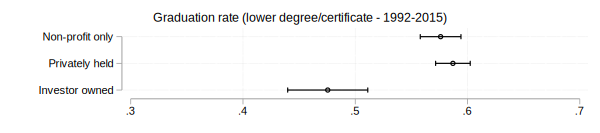

In [4]:
*Adjusted Grad Rate
quietly reg grad_rate_150_p2yr_w i.ownership selective ///
pct2yrchrtgrbkaat pct2yrchrtgrhispt pct2yrchrtgrwhitt   ///
i.year i.iclevel i.state_n pell_grants_per_fte_c_w, cluster(systemid) rob noomitted 

quietly margins i.ownership, atmeans 

marginsplot, horizontal unique recast(scatter) xtitle("") scale(3) xsize(4.5) ysize(1) ///
ytitle("") title("Graduation rate (lower degree/certificate - 1992-2015)") graphregion(margin(large)) ///
name(adjusted_grad_rate2yr, replace) xlab(.3(.1).7) ylabel(1 "Investor owned" 2 "Privately held" 3 "      Non-profit only")





Variables that uniquely identify margins: ownership


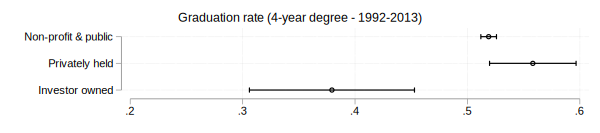

In [5]:
*Adjusted Grad Rate
quietly reg grad_rate_150_p4yr_w i.ownership selective  ///
pct4yrchrtgrbkaat_w pct4yrchrtgrwhitt_w pct4yrchrtgrhispt_w ///
i.year i.iclevel i.state_n pell_grants_per_fte_c_w, cluster(systemid) rob noomitted

quietly margins i.ownership, atmeans

marginsplot, horizontal unique recast(scatter) xtitle("") scale(3) xsize(4.5) ysize(1) ///
ytitle("") title("Graduation rate (4-year degree - 1992-2013)") graphregion(margin(large)) ///
name(adjusted_grad_rate4yr, replace) xlab(.2(.1).6)



(0 differences between ownership and ownershipsys)




Variables that uniquely identify margins: ownershipsys


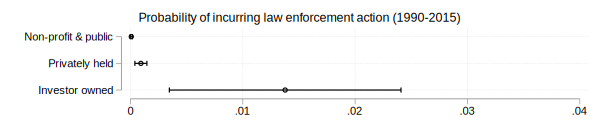

In [6]:
*Adjusted Law enforcement
quietly collapse (rawsum) fte_count (mean) selective ///
white_share_w black_share_w hisp_share_w pell_grants_per_fte_c_w dist_pell_s ///
(first) ownership state_n (min) iclevel (max) law_enf_frst_this_yr [aweight=fte_count], by(systemid year)
recode ownership (1=1 "Investor owned") (2=2 "Privately held") (3=3 "Non-profit & public"), gen(ownershipsys)

quietly logistic law_enf_frst_this_yr i.ownershipsys selective ///
white_share_w black_share_w hisp_share_w pell_grants_per_fte_c_w ///
i.iclevel i.year, cluster(systemid) rob noomitted 

quietly margins i.ownershipsys, atmeans level(88)

marginsplot, horizontal unique recast(scatter) xtitle("") scale(3) xsize(4.5) ysize(1) ///
ytitle("")  title("Probability of incurring law enforcement action (1990-2015)") xtitle("") ///
name(law_enforcement, replace) graphregion(margin(large)) ylab(,  ) xlab(0(.01).04)



. cap noi marginsplot, horizontal unique recast(scatter)  scale(3) xsize(4.5) ys
> ize(1) title(Mean pay for exiting students (1998-2007) 6 years after school (2
> 016 $)) ytitle("") xtitle("") scheme(plotplain) name(adjusted_earnings, replac
> e) xlab(, format(%10.0fc)  ) ylab(,  ) graphregion(margin(large))

Variables that uniquely identify margins: ownership

. if _rc == 0 {
.     noi gr export `"/Users/Charlie/.stata_kernel_cache/graph$stata_kernel_grap
> h_counter.svg"', width(600) replace


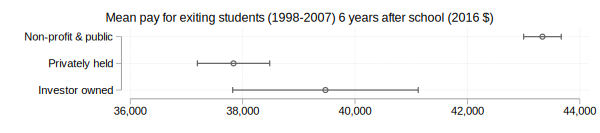

.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            


In [7]:
*Adjusted Earnings
quietly {
use data/d_OPEID_PE_in_Higher_Ed.dta, clear
bysort opeid: egen stabbrmode=mode(stabbr), maxmode
replace stabbr=stabbrmode if stabbr==""

recode owner_pe_c (1=1 "Investor owned") (2=2 "Privately held") (3=3 "Non-profit & public") ///
(4=3 "Non-profit & public"), gen(ownership)
replace ownership=1 if public==1
encode stabbr, gen(state)
egen rpy_3yr_n = rowtotal(lo_inc_rpy_3yr_n md_inc_rpy_3yr_n hi_inc_rpy_3yr_n)
gen rpy_3yr_pct_lo= lo_inc_rpy_3yr_n / rpy_3yr_n * 100
gen earn_pct_lo=lo_inc_yr6_n / overall_yr6_n

** swithch earnings to 2016 $
replace mn_earn_wne_p6_c_w=mn_earn_wne_p6_c_w/0.988
    
reg mn_earn_wne_p6_c_w i.ownership selective i.iclevel ///
white_share_w black_share_w hisp_share_w ///
i.year i.state earn_pct_lo, cluster(systemid) rob noomitted

margins i.ownership, atmeans level( 95)
}
marginsplot, horizontal unique recast(scatter)  scale(3) xsize(4.5) ysize(1) ///
title(Mean pay for exiting students (1998-2007) 6 years after school (2016 $)) ytitle("") xtitle("") scheme(plotplain) ///
name(adjusted_earnings, replace) xlab(, format(%10.0fc)  ) ylab(,  ) graphregion(margin(large))





Variables that uniquely identify margins: ownership


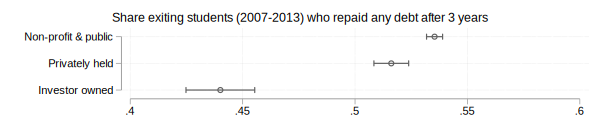

In [8]:
*Adjusted Repayment
*qui replace rpy_3yr_rt_supp_w=rpy_3yr_rt_supp_w/100
quietly reg rpy_3yr_rt_supp_w i.ownership selective i.iclevel ///
white_share_w black_share_w hisp_share_w ///
i.year rpy_3yr_pct_lo i.state, cluster(systemid) rob noomitted

quietly margins i.ownership, atmeans level( 95)

marginsplot, horizontal unique recast(scatter) scale(3) xsize(4.5) ysize(1) ///
xtitle(Students who repaid any debt by 3 years after school (% )) ytitle("") xtitle("") ///
title("Share exiting students (2007-2013) who repaid any debt after 3 years") scheme(plotplain) ///
name(adjusted_repay, replace) xlab(.4(.05).6) ylab(,  )  graphregion(margin(large))

In [9]:
quietly {
use data/d_OPEID_PE_in_Higher_Ed.dta, clear
bysort opeid: egen stabbrmode=mode(stabbr), maxmode
replace stabbr=stabbrmode if stabbr==""
drop if pell_grants_per_fte_c_w==. | black_share_w
bysort opeid: egen maxyear=max(year)
keep if year==maxyear
drop if opeid==.
drop if opeid>999999
merge 1:m opeid using data/century_foundation_borrower_defense, keepusing(claimcount) gen(claim)
collapse (rawsum) claimcount (first) owner_pe_c public selective stabbr systemid ///
fte_count white_share_w black_share_w hisp_share_w pell_grants_per_fte_c_w iclevel ///
, by(opeid)
recode owner_pe_c (1=1 "Investor owned") (2=2 "Privately held") (3=3 "Non-profit & public") ///
(4=3 "Non-profit & public"), gen(ownership)
replace ownership=1 if public==1
encode stabbr, gen(state)
qui gen borrower_defense_1000student = claimcount / fte_count * 1000
winsor borrower_defense_1000student, p(.01) gen(borrower_defense_1000student_w)
}





Variables that uniquely identify margins: ownership


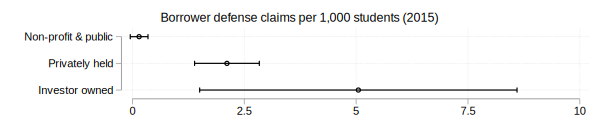

In [10]:
quietly poisson borrower_defense_1000student_w i.ownership selective ///
white_share_w black_share_w hisp_share_w pell_grants_per_fte_c_w ///
i.iclevel i.state, cluster(systemid) rob noomitted

quietly margins i.ownership, atmeans

marginsplot, horizontal unique recast(scatter) xtitle("") scale(3) xsize(4.5) ysize(1) ///
ytitle("") title("Borrower defense claims per 1,000 students (2015)") ///
name(borrower_defense, replace) graphregion(margin(large)) xlab(0(2.5)10,  ) ylab(,  )

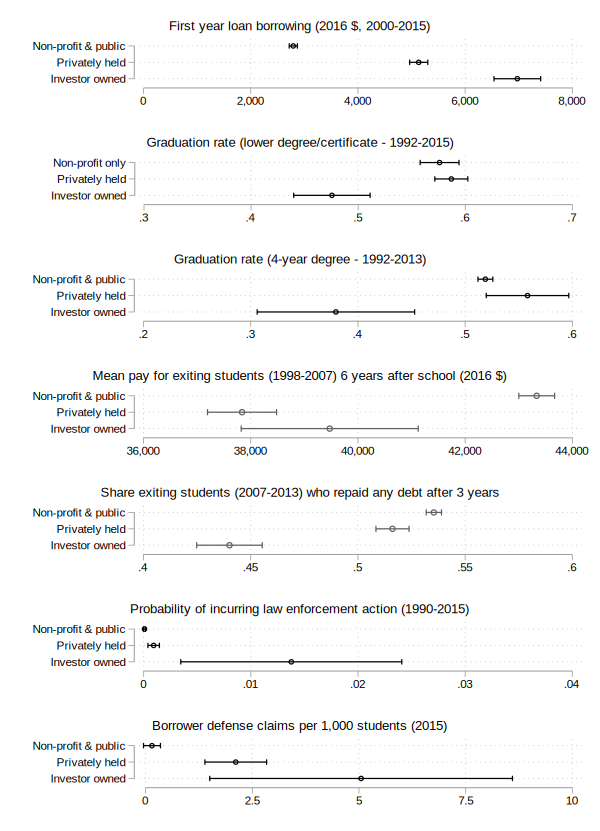




file figures/f5_3_outcomes_ownership.pdf saved as PDF format


In [11]:
graph combine borrowing adjusted_grad_rate2yr adjusted_grad_rate4yr ///
adjusted_earnings adjusted_repay law_enforcement borrower_defense, cols(1) ycommon ///
xsize(6.5) ysize(9) scale(.35) ///
graphregion(margin(small)) name(adjusted_outcomes, replace)

graph export figures/f5_3_outcomes_ownership.pdf, replace